# 主成分分析
* 本実習では教師なし学習のうち主成分分析（PCA; Principal Component Analysis）を行ないます。多次元のデータは全体像を眺めて把握することが困難ですが、主成分分析を用いることで、情報の損失を最小限にしつつ、できるだけ少ない変数に置き換えて全体像を眺めることが可能にになります。
主成分分析を知らない人は、下記のリンクなどを参照
    * <a href="https://www.macromill.com/service/data_analysis/d009.html" target="_blank">主成分分析のモデルと基本式</a>
    * <a href="http://www.gifu-nct.ac.jp/elec/deguchi/sotsuron/hayashi_ad2/node23.html" target="_blank">主成分分析とは</a>
   
<a href="http://nbviewer.jupyter.org/github/maskot1977/ipython_notebook/blob/master/%E5%AE%9F%E7%BF%92%E7%94%A8%E3%83%86%E3%82%99%E3%83%BC%E3%82%BF2017.ipynb">「都道府県別アルコール類の消費量」</a>を例に説明します。

In [1]:
#（シャープ）以降の文字はプログラムに影響しません。
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

In [2]:
# 数値計算やデータフレーム操作に関するライブラリをインポートする
import numpy as np
import pandas as pd
from pandas.tools import plotting # 高度なプロットを行うツールのインポート

In [3]:
# URL によるリソースへのアクセスを提供するライブラリをインポートする。
# import urllib # Python 2 の場合
import urllib.request # Python 3 の場合

In [4]:
import sklearn #機械学習のライブラリ
from sklearn.decomposition import PCA #主成分分析器

In [5]:
# ウェブ上のリソースを指定する
url = 'https://raw.githubusercontent.com/maskot1977/ipython_notebook/master/toydata/sake_dataJ.txt'
# 指定したURLからリソースをダウンロードし、名前をつける。
# urllib.urlretrieve(url, 'sake_dataJ.txt') # Python 2 の場合
urllib.request.urlretrieve(url, 'sake_dataJ.txt') # Python 3 の場合

('sake_dataJ.txt', <http.client.HTTPMessage at 0x10a31a390>)

In [6]:
df = pd.read_csv('sake_dataJ.txt', sep='\t', index_col=0) # データの読み込み

In [7]:
df

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,46476000,50642000,315300000,10488000,9749000
Aomori,17273000,11503000,83164000,1774000,3122000
Iwate,17120000,10220000,67803000,1458000,1870000
Miyagi,27859000,11768000,109850000,2824000,5049000
Akita,24153000,6240000,67894000,1242000,2099000
Yamagata,20570000,6067000,61130000,1706000,2466000
Fukushima,31016000,11166000,100122000,1885000,3807000
Ibaraki,29492000,15105000,126866000,2431000,3012000
Tochigi,19317000,10681000,84792000,1563000,2000000


### 行列の正規化

行列の正規化を行います。行列の正規化について、詳しくは<a href="UsingNumpyAndPandas.ipynb" target="_blank">Numpy と Pandas を用いた演算</a>を参照のこと。

In [8]:
# 行列の正規化
dfs = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)

In [9]:
# 正規化を終えた行列
dfs

,Sake,Shochu,Bear,Wine,Whisky
Pref,,,,,
Hokkaido,0.811237,2.147580,1.057634,1.029017,1.207049
Aomori,-0.437580,-0.210625,-0.389028,-0.298893,-0.126779
Iwate,-0.444123,-0.287929,-0.484757,-0.347047,-0.378772
Miyagi,0.015112,-0.194659,-0.222722,-0.138885,0.261072
Akita,-0.143369,-0.527732,-0.484190,-0.379963,-0.332681
Yamagata,-0.296590,-0.538156,-0.526343,-0.309255,-0.258814
Fukushima,0.150116,-0.230930,-0.283346,-0.281978,0.011092
Ibaraki,0.084945,0.006402,-0.116679,-0.198774,-0.148919
Tochigi,-0.350172,-0.260153,-0.378882,-0.331047,-0.352606


### 主成分分析の実行
主成分分析を実行し、寄与率の最も大きい成分（第一主成分）と二番目に大きい成分（第二主成分）とでプロットすることで、高次元データを２次元空間上に射影し、データの全体構造を眺めることができます。横軸と縦軸の意味は、うまい解釈ができないことが珍しくありません。よく使われる解釈方法としては、近くにプロットされたデータは（プロットに用いられた主成分という観点において）よく似た性質を持っているということです。

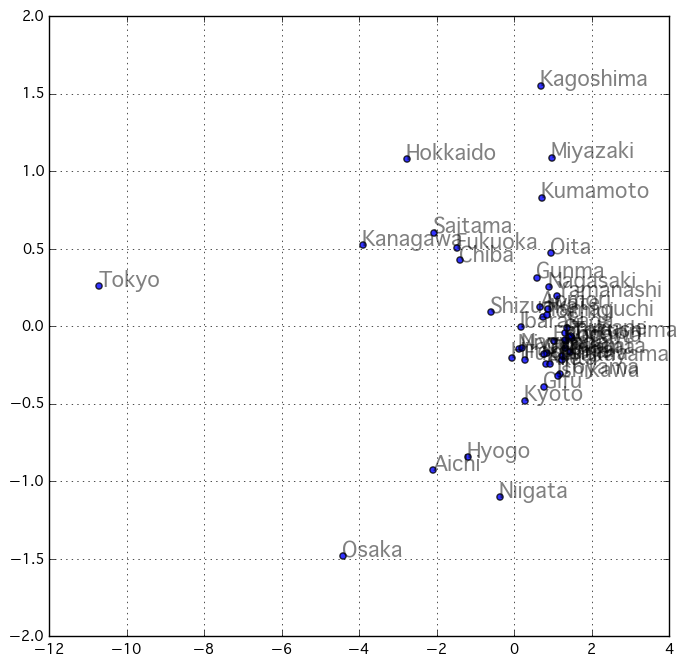

In [10]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :])
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :])
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(8, 8))
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.index):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

上の図から、酒類の消費量という観点において、東京都は他の道府県とは大きく異なっていることや、鹿児島・宮崎・熊本など南九州勢が互いによく似た関係にあることなどが見て取れます。それが具体的にどのような背景によるものかは、今回実行した数値計算だけでは判断は難しく、データの内容そのものに対する理解が必要になると思います。

また、上の結果は<a href="HierarchicalClustering2017.ipynb" target="_blank">階層的クラスタリング</a>の結果と見比べてみると理解が深まると思います。

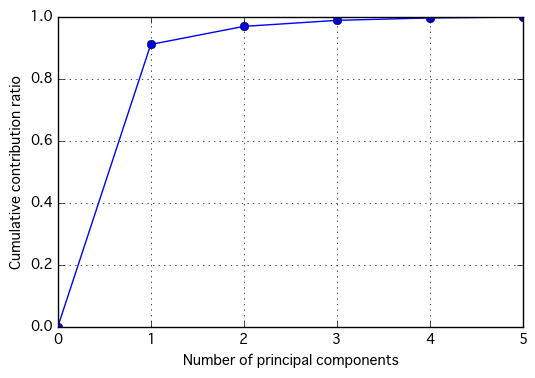

In [11]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

上の図からわかるように、都道府県を Sake, Shochu, Bear, Wine, Whisky という５変数で表しましたが、第二主成分まででその累積寄与率は95%以上になりました。すなわち、変数間の独立性が低いため、第二主成分までで情報量の損失は５％未満に抑えられているということです。

### 行と列を入れ替えて主成分分析
行列の転置を行えば、行と列を入れ替えた主成分分析が行えます。行列の転置について、詳しくは<a href="UsingNumpyAndPandas.ipynb" target="_blank">Numpy と Pandas を用いた演算</a>を参照のこと。

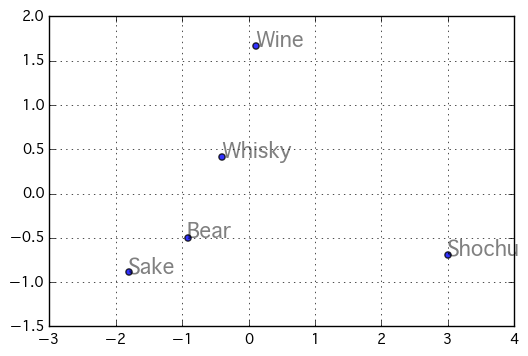

In [12]:
#主成分分析の実行
pca = PCA()
pca.fit(dfs.iloc[:, :].T)
# データを主成分空間に写像 = 次元圧縮
feature = pca.transform(dfs.iloc[:, :].T)
# 第一主成分と第二主成分でプロットする
plt.figure()
for x, y, name in zip(feature[:, 0], feature[:, 1], dfs.columns):
    plt.text(x, y, name, alpha=0.5, size=15)
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.show()

上の結果も、<a href="HierarchicalClustering2017.ipynb" target="_blank">階層的クラスタリング</a>の結果と見比べてみると理解が深まると思います。

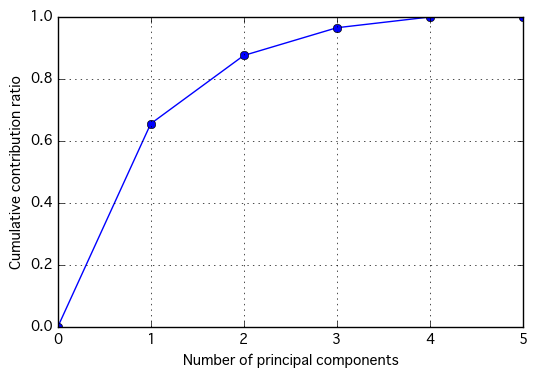

In [13]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution ratio")
plt.grid()
plt.show()

上の図からわかるように、５種類のアルコール飲料を沖縄県を除く都道府県という４６変数で表しましたが、第二主成分まででその累積寄与率は約90%弱になりました。すなわち、変数間の独立性が低いため、第二主成分までで情報量の損失は10%
程度に抑えられているということです。